In [16]:
import numpy as np
import matplotlib.pyplot as plt


dt = int(t[1]-t[0]) # Time step
N = t.size  # Number of steps

# Initialize arrays to store x, y, vx (x'), and vy (y') values
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)

# Initial conditions
x[0] = 0  # Initial x position
y[0] = 0.5 # Initial y position
vy[0] = 0.0  # Initial x velocity
E = 1/2  # Total energy of the system

vx[0] = np.sqrt(2*E-(y[0]**2+2*y[0]**3/3))  # Initial y velocity

# Verlet-like integration loop
for i in range(N-1):
    x[i+1] = x[i] + vx[i]*dt
    y[i+1] = y[i] + vy[i]*dt
    vx[i+1] = vx[i] - (x[i] + 2*x[i]*y[i])*dt
    vy[i+1] = vy[i] - (y[i] + x[i]**2 - y[i]**2)*dt


# Plotting the results
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # Adjust for 2 rows and 3 columns

# x vs. y plot for trajectory
axs[0, 0].plot(x, y, label='Trajectory', color='darkorange')
axs[0, 0].set_title('Trajectory y(x)')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')
axs[0, 0].axis('equal')  # Ensuring aspect ratio is equal to see circular path clearly
axs[0, 0].grid(True)
axs[0, 0].legend()

# Plot for x position
axs[0, 1].plot(t, x, label='x Position', color='blue')
axs[0, 1].set_title('Position x(t)')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Position x')
axs[0, 1].grid(True)
axs[0, 1].legend()

# Plot for x velocity
axs[0, 2].plot(t, vx, label='x Velocity', color='green')
axs[0, 2].set_title('Velocity x\'(t)')
axs[0, 2].set_xlabel('Time')
axs[0, 2].set_ylabel('Velocity x\'')
axs[0, 2].grid(True)
axs[0, 2].legend()

# Plot for y position
axs[1, 0].plot(vy, y, label='y-Py', color='black')
axs[1, 0].set_title('y-Py')
axs[1, 0].set_xlabel('Py')
axs[1, 0].set_ylabel('y')
axs[1, 0].grid(True)
axs[1, 0].legend()


# Plot for y position
axs[1, 1].plot(t, y, label='y Position', color='red')
axs[1, 1].set_title('Position y(t)')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Position y')
axs[1, 1].grid(True)
axs[1, 1].legend()

# Plot for y velocity
axs[1, 2].plot(np.arange(0, N*dt, dt), vy, label='y Velocity', color='purple')
axs[1, 2].set_title('Velocity y\'(t)')
axs[1, 2].set_xlabel('Time')
axs[1, 2].set_ylabel('Velocity y\'')
axs[1, 2].grid(True)
axs[1, 2].legend()

# Hide the unused subplot (bottom left)
axs[1, 0].axis('off')

plt.tight_layout()
plt.show()

NameError: name 'linspace' is not defined

In [26]:
t.size, t[1]-t[0]

(10000, 0.001000100010001)

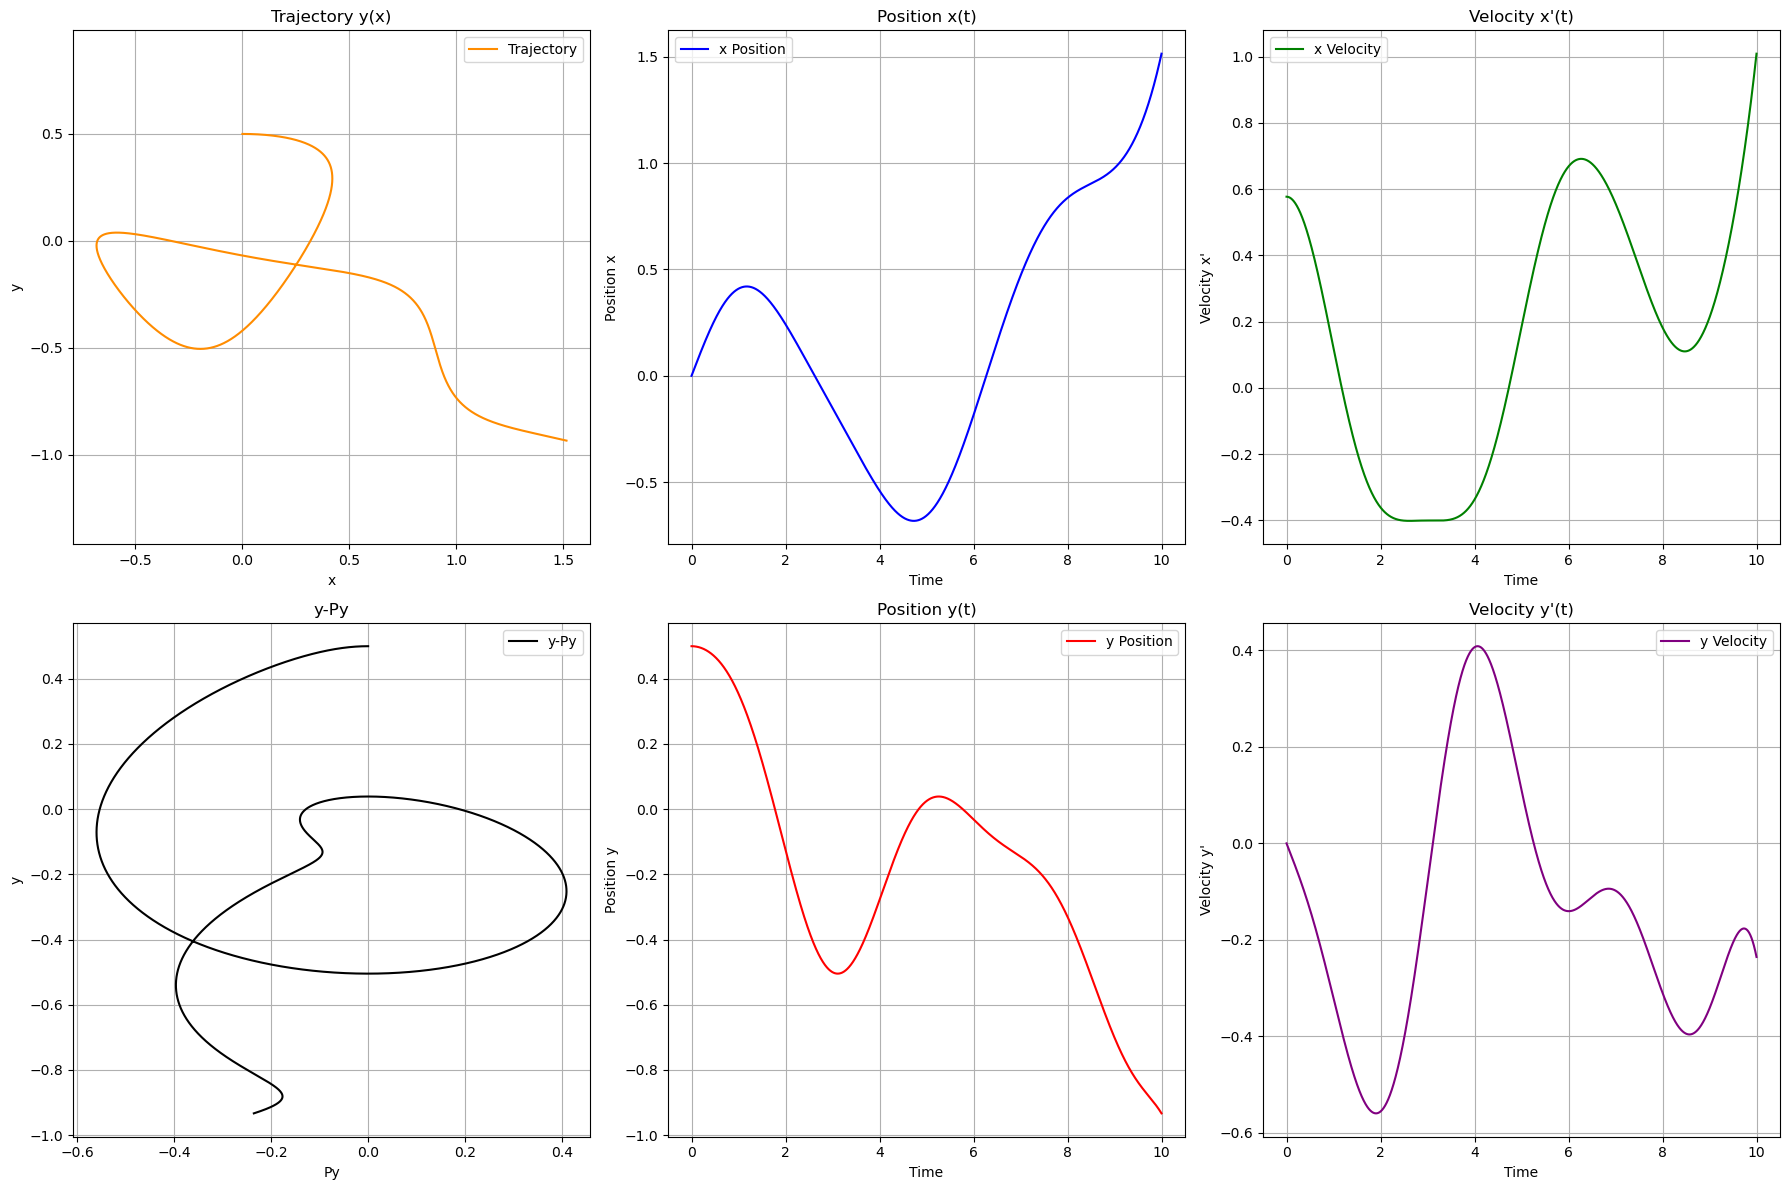

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time step and total number of steps
t = np.linspace(0, 10.0, 10000)
dt = t[1]-t[0] # Time step
N = t.size  # Number of steps

# Initialize arrays to store x, y, vx (x'), and vy (y') values
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)

# Initial conditions
x[0] = 0  # Initial x position
y[0] = 0.5 # Initial y position
vy[0] = 0.0  # Initial x velocity
E = 1/3  # Total energy of the system

vx[0] = np.sqrt(2*E-(y[0]**2+2*y[0]**3/3))  # Initial y velocity

# Function to calculate accelerations
def accelerations(x, y):
    ax = -(x + 2*x*y)
    ay = -(y + x**2 - y**2)
    return ax, ay

# Verlet integration
for i in range(N-1):
    ax, ay = accelerations(x[i], y[i])
    
    # Position update
    x[i+1] = x[i] + vx[i]*dt + 0.5*ax*dt**2
    y[i+1] = y[i] + vy[i]*dt + 0.5*ay*dt**2
    
    # New accelerations based on updated positions
    ax_new, ay_new = accelerations(x[i+1], y[i+1])
    
    # Velocity update
    vx[i+1] = vx[i] + 0.5*(ax + ax_new)*dt
    vy[i+1] = vy[i] + 0.5*(ay + ay_new)*dt

# Plotting the results
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # Adjust for 2 rows and 3 columns

# x vs. y plot for trajectory
axs[0, 0].plot(x, y, label='Trajectory', color='darkorange')
axs[0, 0].set_title('Trajectory y(x)')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')
axs[0, 0].axis('equal')  # Ensuring aspect ratio is equal to see circular path clearly
axs[0, 0].grid(True)
axs[0, 0].legend()

# Plot for x position
axs[0, 1].plot(t, x, label='x Position', color='blue')
axs[0, 1].set_title('Position x(t)')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Position x')
axs[0, 1].grid(True)
axs[0, 1].legend()

# Plot for x velocity
axs[0, 2].plot(t, vx, label='x Velocity', color='green')
axs[0, 2].set_title('Velocity x\'(t)')
axs[0, 2].set_xlabel('Time')
axs[0, 2].set_ylabel('Velocity x\'')
axs[0, 2].grid(True)
axs[0, 2].legend()

# Plot for y position
axs[1, 0].plot(vy, y, label='y-Py', color='black')
axs[1, 0].set_title('y-Py')
axs[1, 0].set_xlabel('Py')
axs[1, 0].set_ylabel('y')
axs[1, 0].grid(True)
axs[1, 0].legend()


# Plot for y position
axs[1, 1].plot(t, y, label='y Position', color='red')
axs[1, 1].set_title('Position y(t)')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Position y')
axs[1, 1].grid(True)
axs[1, 1].legend()

# Plot for y velocity
axs[1, 2].plot(t, vy, label='y Velocity', color='purple')
axs[1, 2].set_title('Velocity y\'(t)')
axs[1, 2].set_xlabel('Time')
axs[1, 2].set_ylabel('Velocity y\'')
axs[1, 2].grid(True)
axs[1, 2].legend()

# Hide the unused subplot (bottom left)
#axs[1, 0].axis('off')

plt.tight_layout()
plt.show()


In [3]:
vy[0], 2*E-(y[0]**2+2*y[0]**3/3)

(0.0, 0.6666666666666667)

In [23]:
x[0:10], y[0:10], vx[0:10], vy[0:10]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([0.81649658, 0.81649658, 0.81649658, 0.81649658, 0.81649658,
        0.81649658, 0.81649658, 0.81649658, 0.81649658, 0.81649658]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))